# Wikidocs 에서 실습할 수 있는 코드를 통한 Tensorlow 활용 및 관련 이론 학습
## (07. 머신 러닝의 개요~)

### 머신 러닝 훑어보기
  

*   샘플(Sample)
  - 하나의 데이터, 하나의 행을 Sample이라고 한다.
*   특성(Feature)
  - 종속 변수 y를 예측하기 위한 각각의 독립변수


+ 혼동 행렬(Confusion Matrix)
  <br> 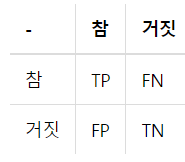
    - T: True, F: False, P: Positive, N: Negative
    - True는 정답을 맞춘 경우, False는 정답을 맞추지 못 한경우
    - Positive와 Negative는 각각 제시했던 정답.

* 정밀도(Precision)
  - 양성이라고 대답한 전체 케이스에 대한 TP의 비율 <br>
  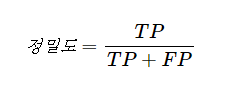 <br>

* 재현율(Recall)
  - 실제 값이 양성인 데이터의 전체 개수에 대해서 TP의 비율
  - 즉, 양성인 데이터 중에서 얼마나 양성인지를 예측(재현) 했는지. <br>

  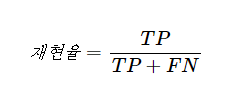

* 과적합(Overfitting)
  - 훈련 데이터를 과하게 학습한 경우
  - 실제 서비스에 대해서는 정확도가 좋지 않는 현상.

<br>

* 과소 적합(Underfitting)
  - 테스트 데이터의 성능이 올라갈 여지가 있음에도 훈련을 덜 한 상태
  - 훈련 데이터에 대해 정확도가 낮음

<br>

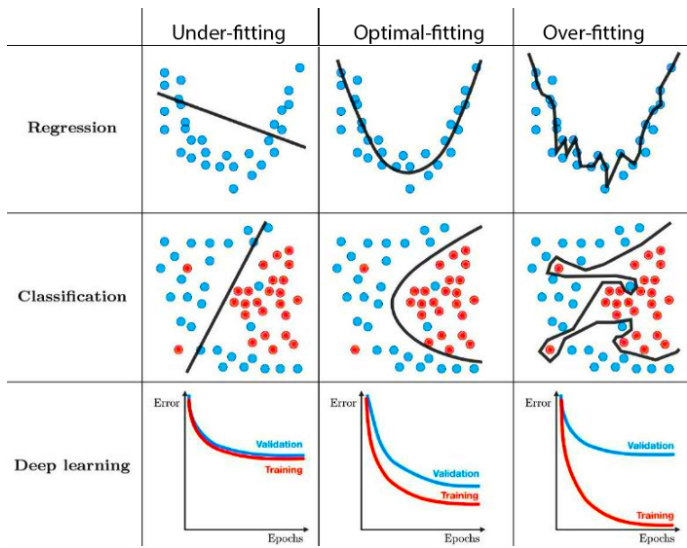

* 실제 값과 예측 값에 대한 오차에 대한 식
  - 목적 함수(Objective Function)
    > 함수의 값을 최소화하거나, 최대화하는 목적을 가진 함수
  - 비용 함수(Cost Function), 손실 함수(Loss Function)
    > 값을 최소화하기 위한 함수

<br>

* MSE (평균 제곱 오차) <br>
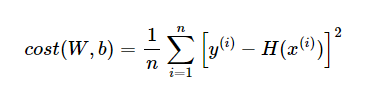


* 옵티마이저(Optimizer)
  - 비용 함수를 최소화하는 매개 변수인 W와 b를 찾기 위한 작업을 수행하는 알고리즘(최적화 알고리즘)
  - 학습(Training): Optimizer를 통해 적절한 W와 b를 찾아내는 과정. <br>
  e.g) 경사하강법(Gradient Descent) <br>
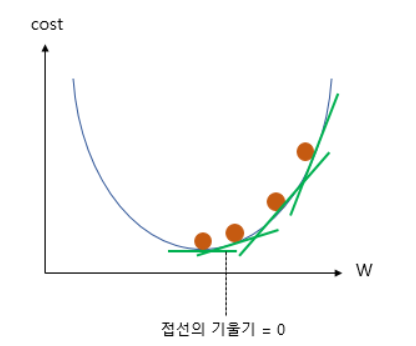

<br>

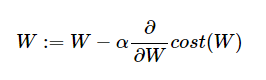


### Keras로 구현하는 선형 회귀

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
X = np.array([1,2,3,4,5,6,7,8,9])
y = np.array([11,22,33,44,53,66,77,87,95])

tf.model = tf.keras.models.Sequential()
tf.model.add(tf.keras.layers.Dense(units=1, input_dim=1, activation='linear'))
tf.model.compile(optimizer=tf.optimizers.SGD(lr=0.01), loss='mse', metrics=['mse'])

tf.model.fit(X, y, batch_size=1, epochs=300, shuffle=False)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/300
9/9 [==============================] - 0s 2ms/step - loss: 441.7968 - mse: 441.7968
Epoch 2/300
9/9 [==============================] - 0s 1ms/step - loss: 2.4296 - mse: 2.4296
Epoch 3/300
9/9 [==============================] - 0s 2ms/step - loss: 2.4185 - mse: 2.4185
Epoch 4/300
9/9 [==============================] - 0s 2ms/step - loss: 2.4080 - mse: 2.4080
Epoch 5/300
9/9 [==============================] - 0s 1ms/step - loss: 2.3978 - mse: 2.3978
Epoch 6/300
9/9 [==============================] - 0s 2ms/step - loss: 2.3881 - mse: 2.3881
Epoch 7/300
9/9 [==============================] - 0s 2ms/step - loss: 2.3789 - mse: 2.3789
Epoch 8/300
9/9 [==============================] - 0s 2ms/step - loss: 2.3700 - mse: 2.3700
Epoch 9/300
9/9 [==============================] - 0s 2ms/step - loss: 2.3615 - mse: 2.3615
Epoch 10/300
9/9 [==============================] - 0s 2ms/step - loss: 2.3533 - mse: 2.3533
Epoch 11/300
9/9 [==============================] - 0s 2ms/step - loss: 2.3

Text(0, 0.5, 'Y')

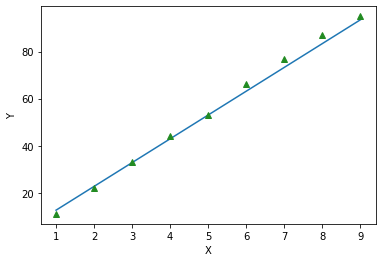

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X, tf.model.predict(X))
plt.plot(X, y, 'bo', color='forestgreen', marker='^')
plt.xlabel('X')
plt.ylabel('Y')

In [ ]:
print(tf.model.predict([9.5]))

[[98.556465]]


### 시그모이드 함수(Sigmoid Function)
  * 0 ~ 1 사이의 값을 가지면서, S자 형태로 그려지는 조건을 충족하는 함수
  <br>

  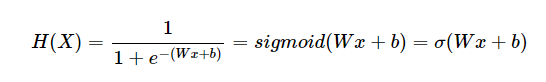

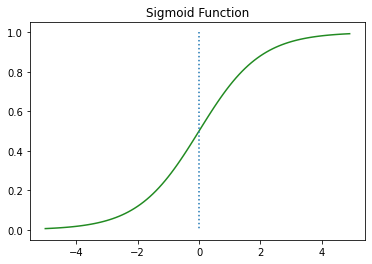

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, color='forestgreen')
plt.plot([0,0], [1.0, 0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

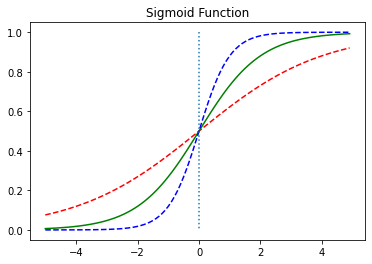

In [ ]:
# W 값의 변화에 따른 Sigmoid Function

y1 = sigmoid(0.5 * x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--')
plt.plot(x, y2, 'g')
plt.plot(x, y3, 'b', linestyle='--')
plt.plot([0,0], [1.0, 0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

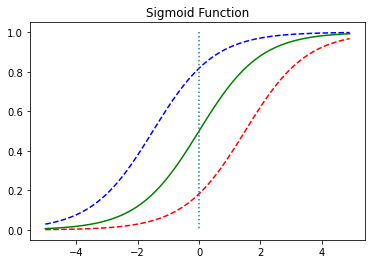

In [ ]:
# bias 값의 변화에 따른 Sigmoid Function
y1 = sigmoid(x - 1.5)
y2 = sigmoid(x)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--')
plt.plot(x, y2, 'g')
plt.plot(x, y3, 'b', linestyle='--')
plt.plot([0,0], [1.0, 0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

### 비용 함수(Cost Function)
* 적절한 가중치를 찾기 위해서는 실제값과 예측값의 오차를 줄여야 하기에 비용함수를 사용.
<br>

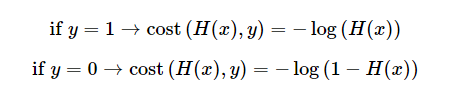

<br>

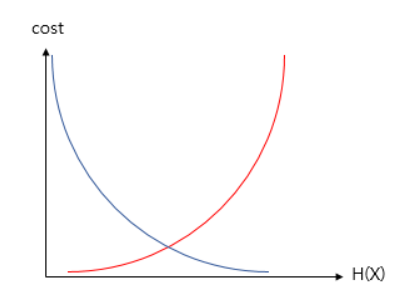

<br>

* 실제값이 1일 때 - 파란색 선 <br>
실제값이 0일 때 - 붉은색 선

* y의 실제값이 1일 때, -logH(x) 그래프를 사용, <br>
y의 실제값이 0일 때, -og(1 - H(x))의 그래프를 사용.

* 위 식을 하나의 식으로 정리한다면 <br>
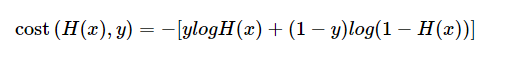


## Keras로 구현하는 로지스틱 회귀

In [ ]:
X = np.array([-50, -40, -30, -20, -10, -5, 0, 5, 10, 20, 30, 40, 50])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]) #숫자 10부터 1

print(f"X.shape: {X.shape}")
print(f"y.shape: {y.shape}")

X.shape: (13,)
y.shape: (13,)


In [ ]:
tf.model = tf.keras.Sequential()
tf.model.add(tf.keras.layers.Dense(units=1, input_dim=1, activation='sigmoid'))

tf.model.compile(optimizer=tf.optimizers.SGD(lr=0.01), loss='binary_crossentropy', metrics=['binary_accuracy'])
tf.model.fit(X, y, batch_size=1, epochs=200, shuffle=False)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


13/13 [==============================] - 0s 2ms/step - loss: 0.2088 - binary_accuracy: 0.9231
Epoch 2/200
13/13 [==============================] - 0s 2ms/step - loss: 0.2059 - binary_accuracy: 0.9231
Epoch 3/200
13/13 [==============================] - 0s 2ms/step - loss: 0.2037 - binary_accuracy: 0.9231
Epoch 4/200
13/13 [==============================] - 0s 2ms/step - loss: 0.2018 - binary_accuracy: 0.9231
Epoch 5/200
13/13 [==============================] - 0s 2ms/step - loss: 0.2001 - binary_accuracy: 0.9231
Epoch 6/200
13/13 [==============================] - 0s 2ms/step - loss: 0.1984 - binary_accuracy: 0.9231
Epoch 7/200
13/13 [==============================] - 0s 1ms/step - loss: 0.1968 - binary_accuracy: 0.9231
Epoch 8/200
13/13 [==============================] - 0s 2ms/step - loss: 0.1952 - binary_accuracy: 0.9231
Epoch 9/200
13/13 [==============================] - 0s 2ms/step - loss: 0.1936 - binary_accuracy: 0.9231
Epoch 10/200
13/13 [==============================] - 0s 2

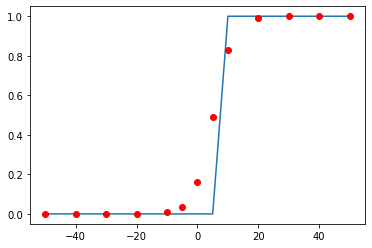

In [ ]:
plt.plot(X, y)
plt.plot(X, tf.model.predict(X), 'ro')

[[0.2111161 ]
 [0.269511  ]
 [0.33715487]
 [0.41219637]
 [0.45156732]]
[[0.86907995]
 [0.9939637 ]
 [0.99975526]
 [0.9999901 ]
 [0.99999946]]


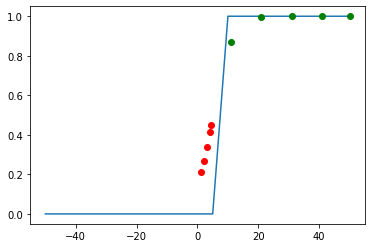

In [ ]:
test_1 = [1, 2, 3, 4, 4.5]
test_2 = [11, 21, 31, 41, 50]

pred_1 = tf.model.predict(test_1)
pred_2 = tf.model.predict(test_2)
print(pred_1)
print(pred_2)

plt.plot(X, y)
plt.plot(test_1, pred_1, 'ro')
plt.plot(test_2, pred_2, 'go')

### 다중 입력에 대한 실습

1. 다중 선형 회귀

In [ ]:
# 입력 벡터의 차원은 3입니다. 즉, input_dim은 3입니다.
# 중간, 기말, 가산점
X = np.array([[70,85,11],[71,89,18],[50,80,20],[99,20,10],[50,10,10]])

# 출력 벡터의 차원은 1입니다. 즉, output_dim은 1입니다.
# 최종 성적
y = np.array([73,82,72,57,34])

print(f"X.shape: {X.shape}")
print(f"y.shape: {y.shape}")

X.shape: (5, 3)
y.shape: (5,)


In [ ]:
tf.model = tf.keras.Sequential()

learning_rate = 0.00001

tf.model.add(tf.keras.layers.Dense(units=1, input_dim=3, activation='linear'))

tf.model.compile(optimizer=tf.optimizers.SGD(lr=learning_rate), loss='mse', metrics=['mse'])
tf.model.fit(X, y, batch_size=1, epochs=2000, shuffle=False)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/2000
5/5 [==============================] - 0s 3ms/step - loss: 1917.0641 - mse: 1917.0641
Epoch 2/2000
5/5 [==============================] - 0s 2ms/step - loss: 330.7703 - mse: 330.7703
Epoch 3/2000
5/5 [==============================] - 0s 2ms/step - loss: 99.8870 - mse: 99.8870
Epoch 4/2000
5/5 [==============================] - 0s 2ms/step - loss: 61.9365 - mse: 61.9365
Epoch 5/2000
5/5 [==============================] - 0s 2ms/step - loss: 52.5806 - mse: 52.5806
Epoch 6/2000
5/5 [==============================] - 0s 3ms/step - loss: 48.2169 - mse: 48.2169
Epoch 7/2000
5/5 [==============================] - 0s 3ms/step - loss: 45.2242 - mse: 45.2242
Epoch 8/2000
5/5 [==============================] - 0s 3ms/step - loss: 42.9075 - mse: 42.9075
Epoch 9/2000
5/5 [==============================] - 0s 3ms/step - loss: 41.0498 - mse: 41.0498
Epoch 10/2000
5/5 [==============================] - 0s 3ms/step - loss: 39.5400 - mse: 39.5400
Epoch 11/2000
5/5 [========================

In [ ]:
print(tf.model.predict(X))

[[73.14883 ]
 [81.98251 ]
 [71.93222 ]
 [57.165176]
 [33.662975]]


In [ ]:
print(y)

[73 82 72 57 34]


2. 다중 로지스틱 회귀

In [ ]:
# 입력 벡터의 차원은 2입니다. 즉, input_dim은 2입니다.
X=np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# 출력 벡터의 차원은 1입니다. 즉, output_dim은 1입니다.
y=np.array([0, 1, 1, 1])

print(f"X.shape: {X.shape}")
print(f"y.shape: {y.shape}")

X.shape: (4, 2)
y.shape: (4,)


In [ ]:
tf.model = tf.keras.Sequential()

tf.model.add(tf.keras.layers.Dense(units=1, input_dim=2, activation='sigmoid'))
tf.model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['binary_accuracy'])

tf.model.fit(X, y, batch_size=1, epochs=800, shuffle=False)

Epoch 1/800
4/4 [==============================] - 0s 4ms/step - loss: 0.7610 - binary_accuracy: 0.7500
Epoch 2/800
4/4 [==============================] - 0s 4ms/step - loss: 0.7533 - binary_accuracy: 0.5000
Epoch 3/800
4/4 [==============================] - 0s 4ms/step - loss: 0.7458 - binary_accuracy: 0.5000
Epoch 4/800
4/4 [==============================] - 0s 4ms/step - loss: 0.7384 - binary_accuracy: 0.5000
Epoch 5/800
4/4 [==============================] - 0s 3ms/step - loss: 0.7313 - binary_accuracy: 0.5000
Epoch 6/800
4/4 [==============================] - 0s 3ms/step - loss: 0.7244 - binary_accuracy: 0.5000
Epoch 7/800
4/4 [==============================] - 0s 3ms/step - loss: 0.7176 - binary_accuracy: 0.5000
Epoch 8/800
4/4 [==============================] - 0s 4ms/step - loss: 0.7110 - binary_accuracy: 0.5000
Epoch 9/800
4/4 [==============================] - 0s 3ms/step - loss: 0.7045 - binary_accuracy: 0.5000
Epoch 10/800
4/4 [==============================] - 0s 4ms/step 

In [ ]:
print(tf.model.predict(X))

[[0.4085847 ]
 [0.89838946]
 [0.82149315]
 [0.9833044 ]]


In [ ]:
print(y)

[0 1 1 1]


## Keras 훑어보기

1. 전처리(Preprocessing)

* Tokenizer(): 토큰화와 정수 인코딩에 사용됨

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

t = Tokenizer()
fit_text = "The earth is an awesome place live"
t.fit_on_texts([fit_text])
print(fit_text)

test_text = "The earth is an awesome place live"
sequences = t.texts_to_sequences([test_text])[0]

print(f"sequences: {sequences}")
print(f"word_index: {t.word_index}")

The earth is an awesome place live
sequences: [1, 2, 3, 4, 5, 6, 7]
word_index: {'the': 1, 'earth': 2, 'is': 3, 'an': 4, 'awesome': 5, 'place': 6, 'live': 7}


* pad_sequnce(): 전체 훈련 데이터에서 각 샘플의 길이는 서로 다를 수 있다. <br>
모델의 입력으로 사용하려면 모든 샘플의 길이를 동일하게 맞추어야할 때가 있다. <br>
이를 자연어 처리에서는 패딩(Padding) 작업이라 하며 보통 숫자 0을 넣어서 길이를 맞춰준다.


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
pad_sequences([[1, 2, 3], [3, 4, 5, 6], [7, 8]], maxlen=3, padding='pre')
# 전처리가 끝나서 각 단어에 대한 정수 인코딩이 끝났다고 가정하고, 3개의 데이터를 입력으로 합니다.

array([[1, 2, 3],
       [4, 5, 6],
       [0, 7, 8]], dtype=int32)

* 첫번째 인자 = 패딩을 진행할 데이터
* maxlen = 모든 데이터에 대해서 정규화 할 길이
* padding = 'pre'를 선택하면 앞에 0을 채우고 'post'를 선택하면 뒤에 0을 채움.

2. 워드 임베딩(Word Embedding)
 > 텍스트의 단어들을 밀집 벡터(dense vector)로 만드는 것을 말한다.

<br>

 * 희소 벡터(sparse vector)
  - 대부분의 값이 0인 벡터 <br>
  e.g) one-hot vector: [0 1 0 0 0 0 0  ..... 0 0 0 0 0 ]

* 밀집 벡터(dense vector)
  - 대부분의 값이 실수이고 상대적으로 저차원 <br>
  e.g) [0.1 -1.2 0.8 0.2 1.8] <br>

  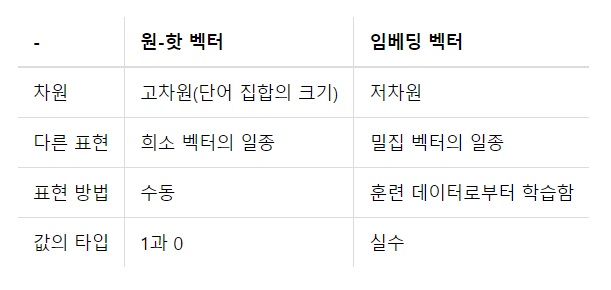
  

3. 모델링(Modeling)
- Sequential(): Keras에서 layer 구성을 위해 사용
- Dense(): fully connected layer를 추가

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=1, input_dim=3, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # 출력층

- units = 출력 뉴런의 수.
- input_dim = 입력 뉴런의 수. (입력의 차원)
- activation = 활성화 함수.
  - linear : 디폴트 값으로 별도 활성화 함수 없이 입력 뉴런과 가중치의 계산 결과 그대로 출력. Ex) 선형 회귀
  - sigmoid : 시그모이드 함수. 이진 분류 문제에서 출력층에 주로 사용되는 활성화 함수.
  - softmax : 소프트맥스 함수. 셋 이상을 분류하는 다중 클래스 분류 문제에서 출력층에 주로 사용되는 활성화 함수.
  - relu : 렐루 함수. 은닉층에 주로 사용되는 활성화 함수.

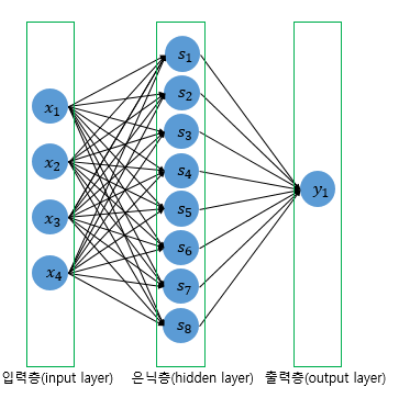

- summary(): 모델의 정보를 요약해서 보여준다.

In [ ]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1)                 4         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 2         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


4. 컴파일(Compile)과 훈련(Training)
- compile(): 모델을 기계가 이해할 수 있도록 컴파일 한다. <br>
오차 함수와 최적화 방법, 메트릭 함수를 선택할 수 있다.

In [ ]:
# 이 코드는 뒤의 텍스트 분류 챕터의 스팸 메일 분류하기 실습 코드를 갖고온 것임.
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential
max_features = 10000

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32)) #RNN에 대한 설명은 뒤의 챕터에서 합니다.
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

위 코드는 임베딩층, 은닉층, 출력층을 추가하여 모델을 설계한 후에, 마지막으로 컴파일 하는 과정을 보여줍니다.

- optimizer : 훈련 과정을 설정하는 옵티마이저를 설정합니다. 'adam'이나 'sgd'와 같이 문자열로 지정할 수도 있습니다.
- loss : 훈련 과정에서 사용할 손실 함수(loss function)를 설정합니다.
- metrics : 훈련을 모니터링하기 위한 지표를 선택합니다.

대표적으로 사용되는 손실 함수와 활성화 함수의 조합은 아래와 같습니다. 더 많은 함수는 케라스 공식문서에서 확인 가능합니다.

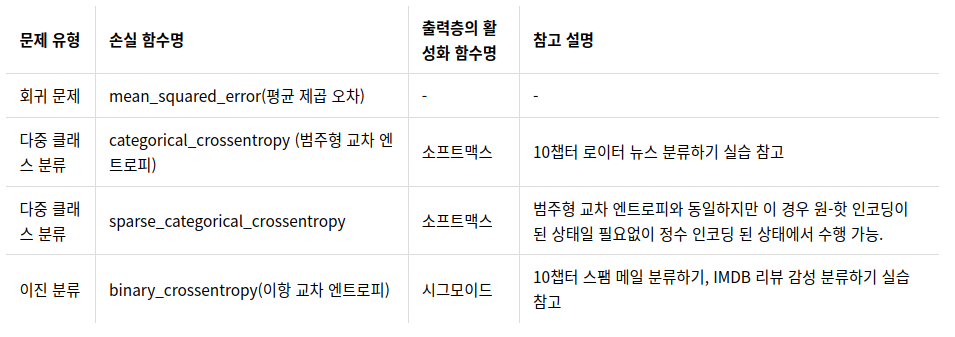

- fit(): 모델을 학습한다. (모델의 훈련을 시작한다)

In [ ]:
# 위의 compile() 코드의 연장선상인 코드
#model.fit(X_train, y_train, epochs=10, batch_size=32)

- 첫 번째 인자 = 훈련 데이터에 해당됩니다.
- 두 번째 인자 = 지도 학습에서 레이블 데이터에 해당됩니다.
- epochs = 에포크. 에포크 1은 전체 데이터를 한 차례 훑고 지나갔음을 의미함. 정수값 기재 필요. 총 훈련 횟수를 정의합니다.
- batch_size = 배치 크기. 기본값은 32. 미니 배치 경사 하강법을 사용하고 싶지 않을 경우에는 batch_size=None을 기재합니다.

In [ ]:
#model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_data(X_val, y_val))

- validation_data(x_val, y_val) = 검증 데이터(validation data)를 사용합니다. <br> 검증 데이터를 사용하면 각 에포크마다 검증 데이터의 정확도도 함께 출력되는데, 이 정확도는 훈련이 잘 되고 있는지를 보여줄 뿐이며 실제로 모델이 검증 데이터를 학습하지는 않습니다. <br> 검증 데이터의 loss가 낮아지다가 높아지기 시작하면 이는 과적합(overfitting)의 신호입니다.

- validation_split= validation_data 대신 사용할 수 있습니다. <br> 검증 데이터를 사용하는 것은 동일하지만, 별도로 존재하는 검증 데이터를 주는 것이 아니라 X_train과 y_train에서 일정 비율을 분리하여 이를 검증 데이터로 사용합니다. <br> 역시나 훈련 자체에는 반영되지 않고 훈련 과정을 지켜보기 위한 용도로 사용됩니다. <br> 아래는 validation_data 대신에 validation_split을 사용했을 경우를 보여줍니다.

- verbose = 학습 중 출력되는 문구를 설정합니다.
  - 0 : 아무 것도 출력하지 않습니다.
  - 1 : 훈련의 진행도를 보여주는 진행 막대를 보여줍니다.
  - 2 : 미니 배치마다 손실 정보를 출력합니다.



5. 평가(Evaluation)와 예측(Prediction)

- evaluate(): 테스트 데이터를 통해 학습한 모델에 대한 정확도를 평가한다.

In [ ]:
# 위의 fit() 코드의 연장선상인 코드
#model.evaluate(X_test, y_test, batch_size=32)

- 첫번째 인자 = 테스트 데이터에 해당됩니다.
- 두번째 인자 = 지도 학습에서 레이블 테스트 데이터에 해당됩니다.
- batch_size = 배치 크기.

- predict(): 임의의 입력에 대한 모델의 출력값을 확인한다.

In [ ]:
# 위의 fit() 코드의 연장선상인 코드
#model.predict(X_input, batch_size=32)

- 첫번째 인자 = 예측하고자 하는 데이터.
- batch_size = 배치 크기.

6. 모델의 저장(Save)과 로드(Load)
> 모델을 저장한다는 것은 학습이 끝난 신경망의 구조를 보존하고 계속해서 사용할 수 있다는 의미

- save(): 인공 신경망 모델을 hdf5 파일에 저장

In [ ]:
#model.save("model_name.h5")

- load_model(): 저장해둔 모델을 불러온다.

In [ ]:
from tensorflow.keras.models import load_model
#model = load_model("model_name.h5")

### Keras의 함수형
  - Sequential API는 여러 층을 공유하거나 다양한 종류의 입력과 출력을 사용하는 등의 복잡한 모델을 만드는 일에는 한계가 있다.

- Functional API로 만든 모델
  - 각 층을 일종의 함수(function)로서 정의한다.
  - 각 함수를 조합하기 위한 연산자들을 제공하는데, <br>
  이를 이용하여 신경망을 설계한다.
  - Sequential API와는 다르게 Functional API 에서는 입력 데이터의 크기(shape)를 인자로 입력층을 정의해주어야 한다.

  1. Fully Connected FFNN (전결합 피드 포워드 신경망)

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [ ]:
# return a tensor
inputs = Input(shape=(10,))
hidden_1 = Dense(64, activation='relu')(inputs)
hidden_2 = Dense(64, activation='relu')(hidden_1)
output = Dense(1, activation='sigmoid')(hidden_2)

model = Model(inputs=inputs, outputs=output)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
#model.fit(data, labels)

2. 선형 회귀(Linear Regression)

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model

In [10]:
X = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

inputs = Input(shape=(1,))
output = Dense(1, activation='linear')(inputs)
linear_model = Model(inputs, output)

linear_model.compile(optimizer=optimizers.SGD(learning_rate=0.01), loss='mse', metrics=['mse'])
linear_model.fit(X, y, batch_size=1, epochs=300, shuffle=False)

Epoch 1/300
9/9 [==============================] - 0s 981us/step - loss: 432.8753 - mse: 432.8753
Epoch 2/300
9/9 [==============================] - 0s 902us/step - loss: 2.4097 - mse: 2.4097
Epoch 3/300
9/9 [==============================] - 0s 934us/step - loss: 2.3995 - mse: 2.3995
Epoch 4/300
9/9 [==============================] - 0s 905us/step - loss: 2.3898 - mse: 2.3898
Epoch 5/300
9/9 [==============================] - 0s 1ms/step - loss: 2.3804 - mse: 2.3804
Epoch 6/300
9/9 [==============================] - 0s 922us/step - loss: 2.3714 - mse: 2.3714
Epoch 7/300
9/9 [==============================] - 0s 913us/step - loss: 2.3629 - mse: 2.3629
Epoch 8/300
9/9 [==============================] - 0s 1ms/step - loss: 2.3546 - mse: 2.3546
Epoch 9/300
9/9 [==============================] - 0s 986us/step - loss: 2.3468 - mse: 2.3468
Epoch 10/300
9/9 [==============================] - 0s 1ms/step - loss: 2.3392 - mse: 2.3392
Epoch 11/300
9/9 [==============================] - 0s 826us/

9/9 [==============================] - 0s 1ms/step - loss: 2.1583 - mse: 2.1583
Epoch 89/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1579 - mse: 2.1579
Epoch 90/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1575 - mse: 2.1575
Epoch 91/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1571 - mse: 2.1571
Epoch 92/300
9/9 [==============================] - 0s 978us/step - loss: 2.1567 - mse: 2.1567
Epoch 93/300
9/9 [==============================] - 0s 989us/step - loss: 2.1564 - mse: 2.1564
Epoch 94/300
9/9 [==============================] - 0s 874us/step - loss: 2.1560 - mse: 2.1560
Epoch 95/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1557 - mse: 2.1557
Epoch 96/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1554 - mse: 2.1554
Epoch 97/300
9/9 [==============================] - 0s 761us/step - loss: 2.1551 - mse: 2.1551
Epoch 98/300
9/9 [==============================] - 0s 920us/step - loss: 2

9/9 [==============================] - 0s 836us/step - loss: 2.1467 - mse: 2.1467
Epoch 175/300
9/9 [==============================] - 0s 970us/step - loss: 2.1467 - mse: 2.1467
Epoch 176/300
9/9 [==============================] - 0s 994us/step - loss: 2.1467 - mse: 2.1467
Epoch 177/300
9/9 [==============================] - 0s 809us/step - loss: 2.1466 - mse: 2.1466
Epoch 178/300
9/9 [==============================] - 0s 911us/step - loss: 2.1466 - mse: 2.1466
Epoch 179/300
9/9 [==============================] - 0s 956us/step - loss: 2.1466 - mse: 2.1466
Epoch 180/300
9/9 [==============================] - 0s 875us/step - loss: 2.1466 - mse: 2.1466
Epoch 181/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1466 - mse: 2.1466
Epoch 182/300
9/9 [==============================] - 0s 935us/step - loss: 2.1465 - mse: 2.1465
Epoch 183/300
9/9 [==============================] - 0s 946us/step - loss: 2.1465 - mse: 2.1465
Epoch 184/300
9/9 [==============================] - 0s 

Epoch 260/300
9/9 [==============================] - 0s 920us/step - loss: 2.1461 - mse: 2.1461
Epoch 261/300
9/9 [==============================] - 0s 952us/step - loss: 2.1461 - mse: 2.1461
Epoch 262/300
9/9 [==============================] - 0s 870us/step - loss: 2.1461 - mse: 2.1461
Epoch 263/300
9/9 [==============================] - 0s 927us/step - loss: 2.1461 - mse: 2.1461
Epoch 264/300
9/9 [==============================] - 0s 917us/step - loss: 2.1461 - mse: 2.1461
Epoch 265/300
9/9 [==============================] - 0s 958us/step - loss: 2.1461 - mse: 2.1461
Epoch 266/300
9/9 [==============================] - 0s 917us/step - loss: 2.1461 - mse: 2.1461
Epoch 267/300
9/9 [==============================] - 0s 854us/step - loss: 2.1461 - mse: 2.1461
Epoch 268/300
9/9 [==============================] - 0s 955us/step - loss: 2.1461 - mse: 2.1461
Epoch 269/300
9/9 [==============================] - 0s 930us/step - loss: 2.1461 - mse: 2.1461
Epoch 270/300
9/9 [=====================

In [ ]:
print(linear_model.predict(X))

[[12.588478]
 [22.702358]
 [32.816242]
 [42.930122]
 [53.044003]
 [63.157887]
 [73.27176 ]
 [83.38564 ]
 [93.49953 ]]


In [ ]:
print(y)

[11, 22, 33, 44, 53, 66, 77, 87, 95]


3. 로지스틱 회귀(Logistic Regression)

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [ ]:
inputs = Input(shape=(3,))
output = Dense(1, activation='sigmoid')(inputs)
logistic_model = Model(inputs, output)

4. 다중 입력을 받는 모델

In [11]:
import numpy as np
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers

# 두 개의 입력층을 정의
inputA = Input(shape=(3,))
inputB = Input(shape=(5,))

# 첫번째 입력층으로부터 분기되어 진행되는 인공 신경망을 정의
x = Dense(16, activation="relu")(inputA)
x = Dense(8, activation="relu")(x)
x = Model(inputs=inputA, outputs=x)

# 두번째 입력층으로부터 분기되어 진행되는 인공 신경망을 정의
y = Dense(64, activation="relu")(inputB)
y = Dense(32, activation="relu")(y)
y = Dense(8, activation="relu")(y)
y = Model(inputs=inputB, outputs=y)

# 두개의 인공 신경망의 출력을 연결(concatenate)
result = concatenate([x.output, y.output])

# 연결된 값을 입력으로 받는 밀집층을 추가(Dense layer)
z = Dense(2, activation="relu")(result)
# 선형 회귀를 위해 activation=linear를 설정
z = Dense(1, activation="linear")(z)

# 결과적으로 이 모델은 두 개의 입력층으로부터 분기되어 진행된 후 마지막에는 하나의 출력을 예측하는 모델이 됨.
model = Model(inputs=[x.input, y.input], outputs=z)

model.compile(optimizer=optimizers.Adam(), loss='mse', metrics=['accuracy'])
model.summary()

Model: "model_27"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_19 (InputLayer)           [(None, 5)]          0                                            
__________________________________________________________________________________________________
input_18 (InputLayer)           [(None, 3)]          0                                            
__________________________________________________________________________________________________
dense_59 (Dense)                (None, 64)           384         input_19[0][0]                   
__________________________________________________________________________________________________
dense_57 (Dense)                (None, 16)           64          input_18[0][0]                   
___________________________________________________________________________________________

### 케라스 서브클래싱
    * Subclassing API로 Functional API가 구현할 수 없는 모델을 구현할 수 있다. (간혹)
    * Functional API는 기본적으로 딥 러닝 모델을 DAG(Directed Acyclic Graph)로 취급한다. <br>
    대부분의 딥 러닝 모델이 이에 속하긴 하지만 항상 그렇지 않다.
    * 예를 들어 재귀 네트워크나 RNN은 이 가정을 따르지 않으며 Functional API에서 구현할 수 없다.

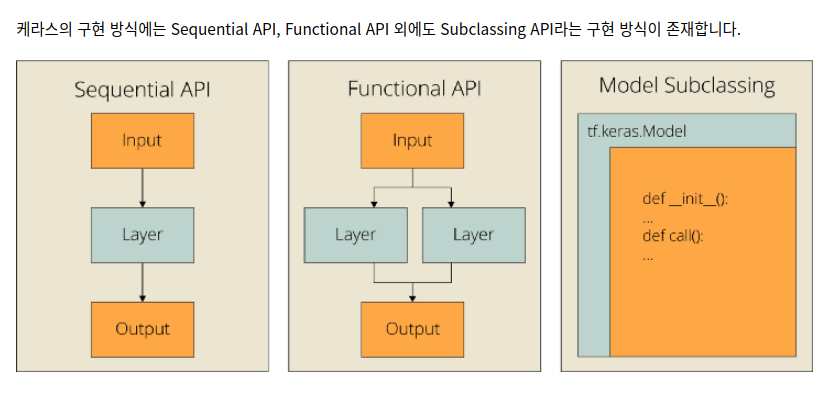

In [12]:
import tensorflow as tf

In [13]:
class LinearRegression(tf.keras.Model):
  def __init__(self):
    super(LinearRegression, self).__init__()
    self.linear_layer = tf.keras.layers.Dense(1, input_dim=1, activation='linear')

  def call(self, x):
    y_pred = self.linear_layer(x)

    return y_pred

In [15]:
model = LinearRegression()

X = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

# sgd는 경사 하강법을 의미. 학습률(learning rate, lr)은 0.01.
sgd = tf.keras.optimizers.SGD(learning_rate=0.01)

# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
model.compile(optimizer=sgd ,loss='mse',metrics=['mse'])

# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 300번 시도합니다.
model.fit(X,y, batch_size=1, epochs=300, shuffle=False)

Epoch 1/300
9/9 [==============================] - 0s 924us/step - loss: 399.3407 - mse: 399.3407
Epoch 2/300
9/9 [==============================] - 0s 891us/step - loss: 2.3367 - mse: 2.3367
Epoch 3/300
9/9 [==============================] - 0s 1ms/step - loss: 2.3295 - mse: 2.3295
Epoch 4/300
9/9 [==============================] - 0s 891us/step - loss: 2.3227 - mse: 2.3227
Epoch 5/300
9/9 [==============================] - 0s 1ms/step - loss: 2.3161 - mse: 2.3161
Epoch 6/300
9/9 [==============================] - 0s 945us/step - loss: 2.3098 - mse: 2.3098
Epoch 7/300
9/9 [==============================] - 0s 851us/step - loss: 2.3037 - mse: 2.3037
Epoch 8/300
9/9 [==============================] - 0s 1ms/step - loss: 2.2979 - mse: 2.2979
Epoch 9/300
9/9 [==============================] - 0s 1ms/step - loss: 2.2923 - mse: 2.2923
Epoch 10/300
9/9 [==============================] - 0s 810us/step - loss: 2.2870 - mse: 2.2870
Epoch 11/300
9/9 [==============================] - 0s 1ms/step

9/9 [==============================] - 0s 991us/step - loss: 2.1553 - mse: 2.1553
Epoch 89/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1550 - mse: 2.1550
Epoch 90/300
9/9 [==============================] - 0s 816us/step - loss: 2.1547 - mse: 2.1547
Epoch 91/300
9/9 [==============================] - 0s 922us/step - loss: 2.1544 - mse: 2.1544
Epoch 92/300
9/9 [==============================] - 0s 841us/step - loss: 2.1541 - mse: 2.1541
Epoch 93/300
9/9 [==============================] - 0s 970us/step - loss: 2.1538 - mse: 2.1538
Epoch 94/300
9/9 [==============================] - 0s 938us/step - loss: 2.1536 - mse: 2.1536
Epoch 95/300
9/9 [==============================] - 0s 956us/step - loss: 2.1533 - mse: 2.1533
Epoch 96/300
9/9 [==============================] - 0s 882us/step - loss: 2.1531 - mse: 2.1531
Epoch 97/300
9/9 [==============================] - 0s 978us/step - loss: 2.1529 - mse: 2.1529
Epoch 98/300
9/9 [==============================] - 0s 1ms/step -

9/9 [==============================] - 0s 1ms/step - loss: 2.1465 - mse: 2.1465
Epoch 175/300
9/9 [==============================] - 0s 939us/step - loss: 2.1465 - mse: 2.1465
Epoch 176/300
9/9 [==============================] - 0s 875us/step - loss: 2.1465 - mse: 2.1465
Epoch 177/300
9/9 [==============================] - 0s 968us/step - loss: 2.1465 - mse: 2.1465
Epoch 178/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1465 - mse: 2.1465
Epoch 179/300
9/9 [==============================] - 0s 813us/step - loss: 2.1465 - mse: 2.1465
Epoch 180/300
9/9 [==============================] - 0s 907us/step - loss: 2.1464 - mse: 2.1464
Epoch 181/300
9/9 [==============================] - 0s 975us/step - loss: 2.1464 - mse: 2.1464
Epoch 182/300
9/9 [==============================] - 0s 964us/step - loss: 2.1464 - mse: 2.1464
Epoch 183/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1464 - mse: 2.1464
Epoch 184/300
9/9 [==============================] - 0s 922u

9/9 [==============================] - 0s 830us/step - loss: 2.1461 - mse: 2.1461
Epoch 261/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1461 - mse: 2.1461
Epoch 262/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1461 - mse: 2.1461
Epoch 263/300
9/9 [==============================] - 0s 839us/step - loss: 2.1461 - mse: 2.1461
Epoch 264/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1460 - mse: 2.1460
Epoch 265/300
9/9 [==============================] - 0s 928us/step - loss: 2.1460 - mse: 2.1460
Epoch 266/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1460 - mse: 2.1460
Epoch 267/300
9/9 [==============================] - 0s 853us/step - loss: 2.1460 - mse: 2.1460
Epoch 268/300
9/9 [==============================] - 0s 975us/step - loss: 2.1460 - mse: 2.1460
Epoch 269/300
9/9 [==============================] - 0s 785us/step - loss: 2.1460 - mse: 2.1460
Epoch 270/300
9/9 [==============================] - 0s 1ms/st

* 3가지 구현 방식 비교 <br>
    1) Sequential API <br>
    장점 : 단순하게 층을 쌓는 방식으로 쉽고 사용하기가 간단합니다. <br>
    단점 : 다수의 입력(multi-input), 다수의 출력(multi-output)을 가진 모델 또는 층 간의 연결(concatenate)이나 덧셈(Add)과 같은 연산을 하는 모델을 구현하기에는 적합하지 않습니다. 이런 모델들의 구현은 Functional API를 사용해야 합니다.
    
    <br>
    
    2) Functional API <br>
    장점 : Sequential API로는 구현하기 어려운 복잡한 모델들을 구현할 수 있습니다. <br>
    단점 : 입력의 크기(shape)를 명시한 입력층(Input layer)을 모델의 앞단에 정의해주어야 합니다. 가령, 아래의 코드를 봅시다.

    <br>
    
    3) Subclassing API <br>
    장점 : Functional API로도 구현할 수 없는 모델들조차 구현이 가능합니다. <br>
    단점 : 객체 지향 프로그래밍(Object-oriented programming)에 익숙해야 하므로 코드 사용이 가장 까다롭습니다.    


## 다층 퍼셉트론(MLP)로 텍스트 분류하기

In [18]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

In [19]:
texts = ['먹고 싶은 사과', '먹고 싶은 바나나', '길고 노란 바나나 바나나', '저는 과일이 좋아요']

In [20]:
t = Tokenizer()
t.fit_on_texts(texts)
print(t.word_index)

{'바나나': 1, '먹고': 2, '싶은': 3, '사과': 4, '길고': 5, '노란': 6, '저는': 7, '과일이': 8, '좋아요': 9}


In [21]:
print(t.texts_to_matrix(texts, mode='count'))

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


In [22]:
print(t.texts_to_matrix(texts, mode = 'binary'))

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


In [23]:
print(t.texts_to_matrix(texts, mode = 'tfidf').round(2)) # 둘째 자리까지 반올림하여 출력

[[0.   0.   0.85 0.85 1.1  0.   0.   0.   0.   0.  ]
 [0.   0.85 0.85 0.85 0.   0.   0.   0.   0.   0.  ]
 [0.   1.43 0.   0.   0.   1.1  1.1  0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.1  1.1  1.1 ]]


In [24]:
print(t.texts_to_matrix(texts, mode = 'freq').round(2)) # 둘째 자리까지 반올림하여 출력

[[0.   0.   0.33 0.33 0.33 0.   0.   0.   0.   0.  ]
 [0.   0.33 0.33 0.33 0.   0.   0.   0.   0.   0.  ]
 [0.   0.5  0.   0.   0.   0.25 0.25 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.33 0.33 0.33]]


1. 20개 뉴스 그룹 데이터에 대한 이해

In [26]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

In [27]:
newsdata = fetch_20newsgroups(subset = 'train') # 'train'을 기재하면 훈련 데이터만 리턴한다.

In [28]:
print(newsdata.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [29]:
print('훈련용 샘플의 개수 : {}'.format(len(newsdata.data)))

훈련용 샘플의 개수 : 11314


In [30]:
print('총 주제의 개수 : {}'.format(len(newsdata.target_names)))
print(newsdata.target_names)

총 주제의 개수 : 20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [32]:
print('첫번째 샘플의 레이블 : {}'.format(newsdata.target[0]))

첫번째 샘플의 레이블 : 7


In [34]:
print('7번 레이블이 의미하는 주제 : {}'.format(newsdata.target_names[7]))

7번 레이블이 의미하는 주제 : rec.autos


In [35]:
print(newsdata.data[0]) # 첫번째 샘플 출력

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [36]:
data = pd.DataFrame(newsdata.data, columns = ['email']) # data로부터 데이터프레임 생성
data['target'] = pd.Series(newsdata.target) # target 열 추가
data[:5] # 상위 5개 행을 출력

,email,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   11314 non-null  object
 1   target  11314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 176.9+ KB


In [38]:
data.isnull().values.any()

False

In [39]:
print('중복을 제외한 샘플의 수 : {}'.format(data['email'].nunique()))
print('중복을 제외한 주제의 수 : {}'.format(data['target'].nunique()))

중복을 제외한 샘플의 수 : 11314
중복을 제외한 주제의 수 : 20


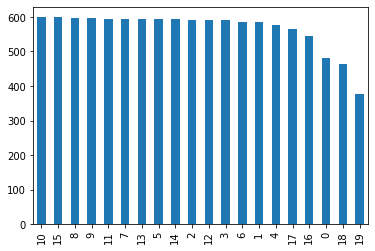

In [40]:
data['target'].value_counts().plot(kind='bar');

In [41]:
print(data.groupby('target').size().reset_index(name='count'))

    target  count
0        0    480
1        1    584
2        2    591
3        3    590
4        4    578
5        5    593
6        6    585
7        7    594
8        8    598
9        9    597
10      10    600
11      11    595
12      12    591
13      13    594
14      14    593
15      15    599
16      16    546
17      17    564
18      18    465
19      19    377


In [42]:
newsdata_test = fetch_20newsgroups(subset='test', shuffle=True) # 'test'를 기재하면 테스트 데이터만 리턴한다.
train_email = data['email'] # 훈련 데이터의 본문 저장
train_label = data['target'] # 훈련 데이터의 레이블 저장
test_email = newsdata_test.data # 테스트 데이터의 본문 저장
test_label = newsdata_test.target # 테스트 데이터의 레이블 저장

In [43]:
max_words = 10000 # 실습에 사용할 단어의 최대 개수
num_classes = 20 # 레이블의 수

In [44]:
def prepare_data(train_data, test_data, mode): # 전처리 함수
    t = Tokenizer(num_words = max_words) # max_words 개수만큼의 단어만 사용한다.
    t.fit_on_texts(train_data)
    X_train = t.texts_to_matrix(train_data, mode=mode) # 샘플 수 × max_words 크기의 행렬 생성
    X_test = t.texts_to_matrix(test_data, mode=mode) # 샘플 수 × max_words 크기의 행렬 생성
    return X_train, X_test, t.index_word

In [45]:
X_train, X_test, index_to_word = prepare_data(train_email, test_email, 'binary') # binary 모드로 변환
y_train = to_categorical(train_label, num_classes) # 원-핫 인코딩
y_test = to_categorical(test_label, num_classes) # 원-핫 인코딩

In [46]:
print('훈련 샘플 본문의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 본문의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 본문의 크기 : (11314, 10000)
훈련 샘플 레이블의 크기 : (11314, 20)
테스트 샘플 본문의 크기 : (7532, 10000)
테스트 샘플 레이블의 크기 : (7532, 20)


In [47]:
print('빈도수 상위 1번 단어 : {}'.format(index_to_word[1]))
print('빈도수 상위 9999번 단어 : {}'.format(index_to_word[9999]))

빈도수 상위 1번 단어 : the
빈도수 상위 9999번 단어 : mic


### 모델 설계

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [73]:
def fit_and_evaluate(x_train, y_train, x_test, y_test):
    print(x_train.shape, y_train.shape)
    
    model = Sequential()
    model.add(Dense(256, input_dim=max_words, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(x_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.1)
    score = model.evaluate(x_test, y_test, batch_size=128, verbose=0)
    return score[1]

In [74]:
modes = ['binary', 'count', 'tfidf', 'freq'] # 4개의 모드를 리스트에 저장.

for mode in modes: # 4개의 모드에 대해서 각각 아래의 작업을 반복한다.
    X_train, X_test, _ = prepare_data(train_email, test_email, mode) # 모드에 따라서 데이터를 전처리
    score = fit_and_evaluate(X_train, y_train, X_test, y_test) # 모델을 훈련하고 평가.
    print(mode+' 모드의 테스트 정확도:', score)

(11314, 10000) (11314, 20)
Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_129 (Dense)            (None, 256)               2560256   
_________________________________________________________________
dropout_42 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_130 (Dense)            (None, 128)               32896     
_________________________________________________________________
dropout_43 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_131 (Dense)            (None, 20)                2580      
Total params: 2,595,732
Trainable params: 2,595,732
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
80/80 [==============================] - 2s 20ms/step - loss: 2.2833 - a